In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR, IMAGES_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
data_with_index = df.set_index("Projects")
data_with_index.reset_index(inplace=True)

data_with_index.rename(columns={'MySQL_Maria DB': 'MySQL'}, inplace=True)
data_with_index.rename(columns={'PostgreSQL_ CockroachDB': 'PostgreSQL'}, inplace=True)
data_with_index.rename(columns={'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server'}, inplace=True)

data_with_index.head()


,Projects,Domains,Virtuoso-NoSql,Microsoft Azure Table Storage,MySQL,HyperSQL,Ignite-NoSql,MarkLogic,MS SQL Server,Ignite-Sql,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostgreSQL,PostGIS,Etcd
0,activemq,Network,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Activiti,Enterprise Resource Planning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aima-java,Software Development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,lottie-android,Game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aliyun-openapi-java-sdk,Infrastructure Management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            134.0
H2                               112.0
PostgreSQL                       111.0
Redis                             94.0
Oracle                            91.0
HyperSQL                          62.0
MS SQL Server                     62.0
MongoDB                           53.0
Google Cloud Datastore            37.0
IBM DB2                           35.0
DynamoDB                          35.0
SQLite                            34.0
Cassandra                         29.0
HBase                             21.0
Hazelcast                         19.0
SAP SQL Anywhere                  15.0
ClickHouse                        15.0
MarkLogic                         15.0
SAP Adaptive Server               14.0
Neo4j                             12.0
Firebird                          12.0
Informix                          12.0
PostGIS                           12.0
SapHana                           10.0
Teradata                          10.0
Snowflake                

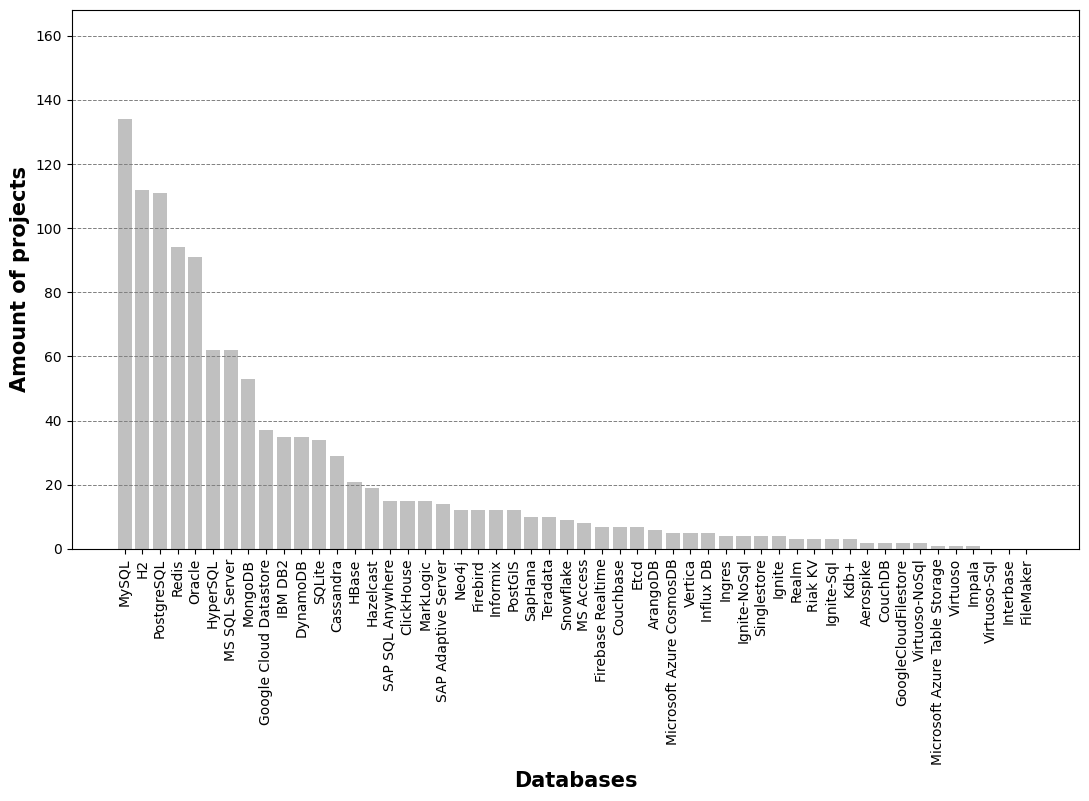

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = data_with_index.iloc[:, 2:].sum().sort_values(ascending=False)

# Gráfico de barras
plt.bar(df.index, df.values, color='silver')
#addlabels(df.index, df.values)

# Adicionando linhas horizontais nas marcações do eixo Y
y_ticks = plt.gca().get_yticks()  # Obtém as marcações do eixo Y

for y_tick in y_ticks:
    plt.axhline(y=y_tick, color='gray', linestyle='--', linewidth=0.7)  # Adiciona linhas horizontais

plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight="bold", fontsize=15)
plt.ylabel("Amount of projects", fontweight="bold", fontsize=15)

#plt.title("Distributions of Databases in Java Projects")
plt.show()


In [5]:
# Ajustando o df para que eu possa fazer o gráfico de forma empilhada
db_types = data_with_index.iloc[:, data_with_index.columns != 'Domains']
db_types = db_types.set_index('Projects').transpose()
db_types.index.name = 'Databases'
relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM_DB2', 'MS_Access', 'SQLite',  'Snowflake', 
                  'Teradata', 'SapHana', 'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite-Sql', 'Virtuoso-Sql']

map_dict = {name: "Relational" for name in relational_dbs}

db_types['Model'] = db_types.index.to_series().map(map_dict)
db_types['Model'] = db_types['Model'].fillna("Non Relational")
model = db_types.pop("Model")
db_types.insert(0, "Model", model)
db_types['Relational'] = db_types.apply(lambda row: row.iloc[1:].sum() if row['Model'] == 'Relational' else 0, axis=1)
db_types['Non Relational'] = db_types.apply(lambda row: row.iloc[1:].sum() if row['Model'] == 'Non Relational' else 0, axis=1)

db_types.loc[['MarkLogic'], 'Model'] = 'Multi Model' #'Virtuoso', 'Ignite', Retirei pois estava com erro.
#db_types.loc['Virtuoso', 'Relational'] = 0
#db_types.loc['Virtuoso', 'Non Relational'] = 2
#db_types.loc['Ignite', 'Relational'] = 2
db_types.loc['Ignite', 'Non Relational'] = 3
db_types.loc['MarkLogic', 'Relational'] = 0
db_types.loc['MarkLogic', 'Non Relational'] = 3

db_types.rename(columns={'Projects':  ''},)
db_types.to_excel("output.xlsx")


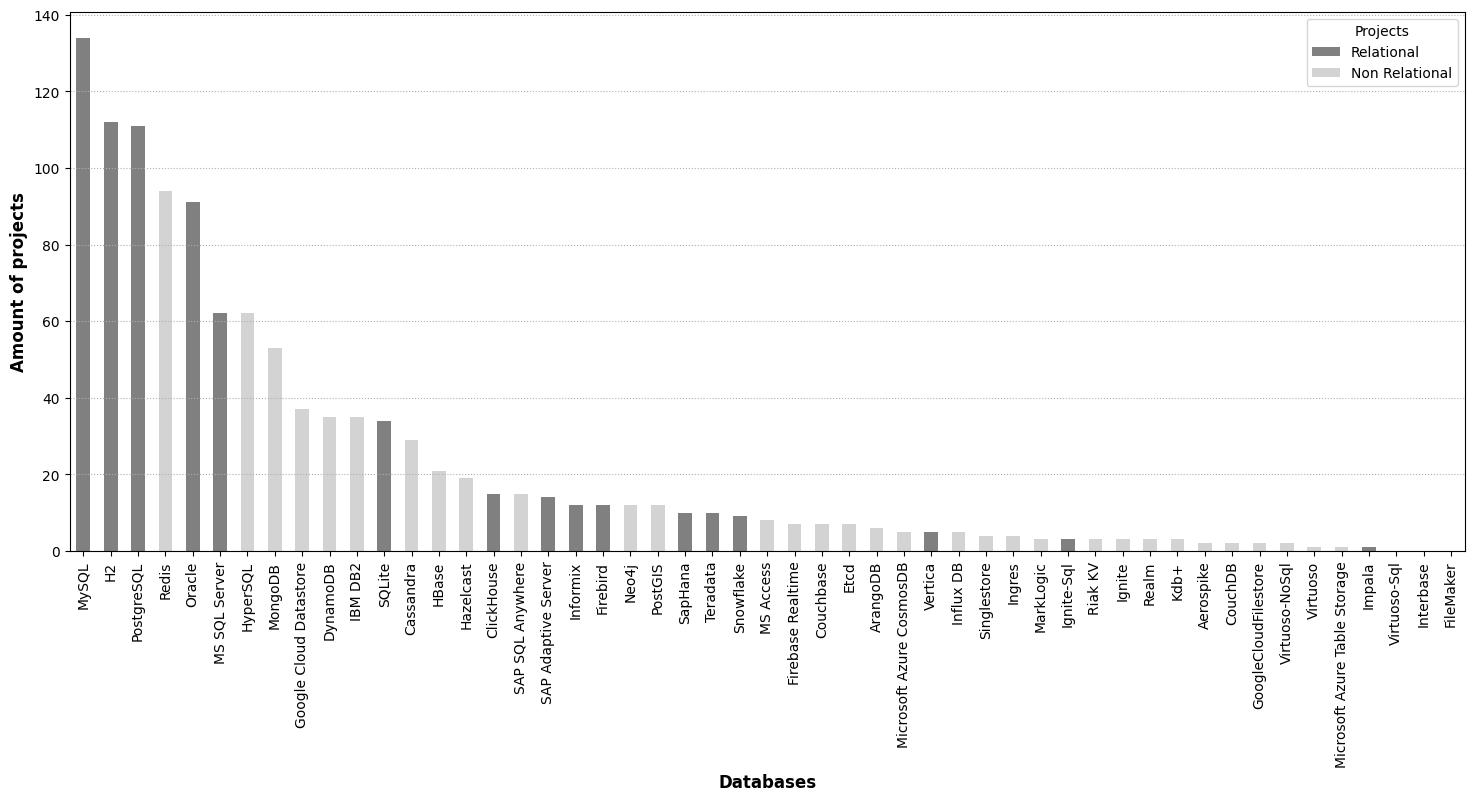

In [6]:
# Preparação dos dados (mesmo que já estava)
df_graph = db_types[['Model', 'Relational', 'Non Relational']].copy()
df_graph['Amount of Projects'] = db_types['Relational'] + db_types['Non Relational']
df_graph.drop(['Ignite-NoSql'], inplace=True)  # Remover banco específico

df_graph = df_graph.sort_values(by='Amount of Projects', ascending=False)

# Define uma paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['gray', 'lightgray']))

# Cria o gráfico de barras empilhadas
ax = df_graph.plot(y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(18, 7))

# Configurações do eixo
ax.set_xlabel("Databases", fontsize=12, fontweight='bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight='bold')

# Remove as anotações (números) nas barras
# for i in ax.patches:  
#     if i.get_height() != 0:
#         ax.annotate(str(int(i.get_height())), (i.get_x() + i.get_width() / 2, i.get_height()),
#                     ha='center', va='baseline', fontsize=10, color='black', 
#                     xytext=(0, 1), textcoords='offset points')

# Adiciona grid pontilhado no eixo Y
plt.grid(axis='y', linestyle=':', linewidth=0.8)

# Salvar como PDF
plt.savefig(IMAGES_DIR + "/fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [7]:
relational_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM_DB2', 'MS_Access', 'SQLite',  'Snowflake', 
                  'Teradata', 'SapHana', 'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2', 'Ignite_Sql', 'Virtuoso_Sql']
relational_dbs

['Oracle',
 'MySQL',
 'MS SQL Server',
 'PostgreSQL',
 'IBM_DB2',
 'MS_Access',
 'SQLite',
 'Snowflake',
 'Teradata',
 'SapHana',
 'FileMaker',
 'SAP Adaptive Server',
 'Informix',
 'Firebird',
 'Vertica',
 'Impala',
 'ClickHouse',
 'H2',
 'Ignite_Sql',
 'Virtuoso_Sql']

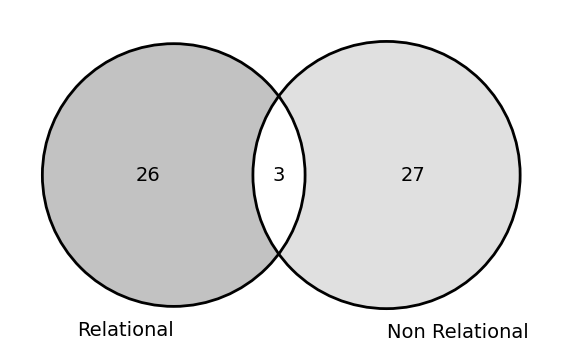

In [8]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
characterization_of_projects = pd.read_excel(RESOURCE_DIR + os.sep + 'output.xlsx', keep_default_na=False)

plt.figure(figsize=(7,7))
count_of_models = characterization_of_projects['Model'].value_counts()
A = count_of_models['Relational']
B = count_of_models['Non Relational']
AB = count_of_models['Multi Model']

venn = venn2(subsets = (A, B, AB), set_labels=('Relational', 'Non Relational'), set_colors=('darkgray', 'lightgray'), alpha= 0.7)
venn2_circles(subsets=(A, B, AB))

for text in venn.set_labels:  #change label size
 text.set_fontsize(14);
for text in venn.subset_labels:  #change number size
 text.set_fontsize(14)

 plt.savefig(IMAGES_DIR+"/fig10.pdf", format="pdf", bbox_inches="tight")

In [9]:
data_only_relational= data_with_index[relational_dbs].sum().sort_values(ascending=False)
data_only_relational

# Ver com a Camila, em relação a diferença de números entre o gráfico do paper e o meu

KeyError: "['IBM_DB2', 'MS_Access', 'Ignite_Sql', 'Virtuoso_Sql'] not in index"

In [45]:
# Graph DBMS by Relational Model
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(data_only_relational.index, data_only_relational.values, color = 'silver')
addlabels(data_only_relational.index, data_only_relational.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

plt.show() 


NameError: name 'data_only_relational' is not defined

<Figure size 1300x700 with 0 Axes>

In [41]:
data_only_non_relational = data_with_index.copy()
data_only_non_relational.drop(columns=relational_dbs, inplace=True)
data_only_non_relational

KeyError: "['IBM_DB2', 'MS_Access', 'Ignite_Sql', 'Virtuoso_Sql'] not found in axis"

In [52]:
#data_only_non_relational.drop(['MarkLogic', 'Ignite', 'Virtuoso'], inplace=True, axis=1)

In [10]:
data_only_non_relational = data_only_non_relational.iloc[: , 2:].sum().sort_values(ascending=False)
data_only_non_relational

NameError: name 'data_only_non_relational' is not defined

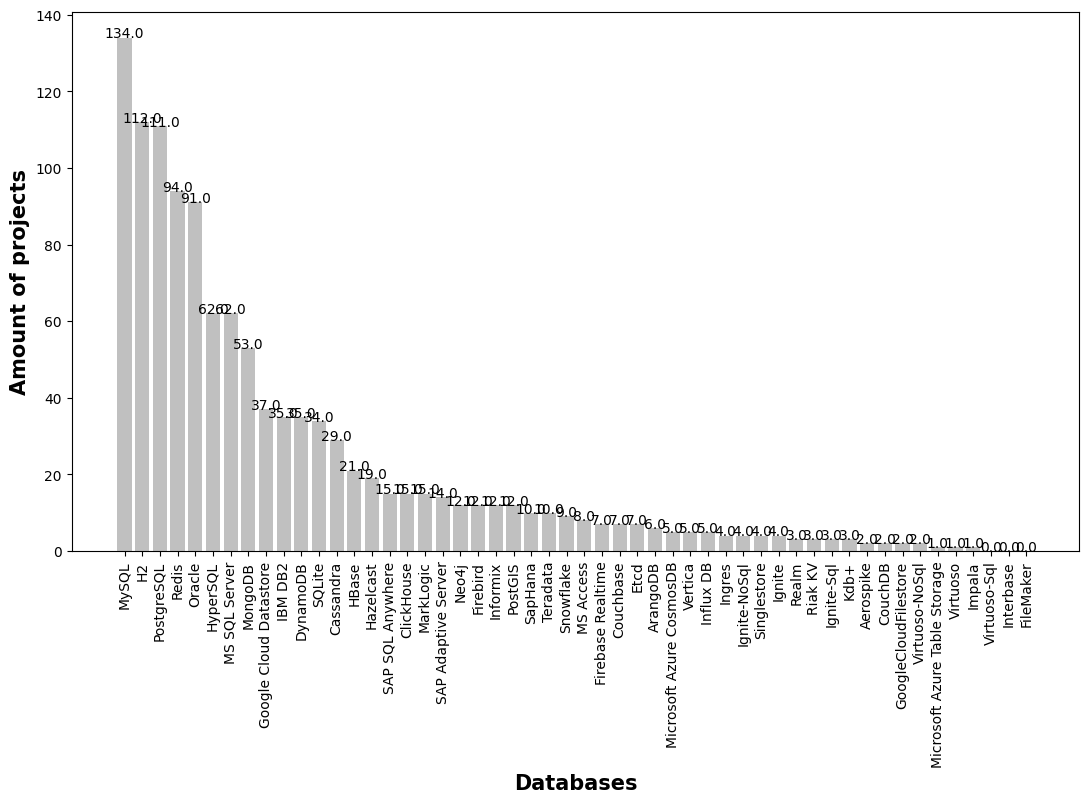

In [47]:
# Graph DBSM by Non Relational Model
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(data_only_non_relational.index, data_only_non_relational.values, color = 'silver')
addlabels(data_only_non_relational.index, data_only_non_relational.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

plt.show() 

In [11]:
# Get frequency of values in the 'Domains' column
freq_domains = data_with_index['Domains'].value_counts()
freq_domains

Software Development            118
Data Management                  98
Infrastructure Management        40
Program Analysis                 33
Security                         26
Automation                       23
Game                             22
Network                          20
Media                            18
Monitoring                       15
Collaboration                    12
Artificial Intelligence          11
Enterprise Resource Planning     11
File Management                   9
Personal Management               8
Cryptocurrency                    7
Artificial Intelligence           5
Other                             4
High Performance Computing        4
Finances                          3
infrastructure Management         1
Name: Domains, dtype: int64

In [12]:
# Get the top 5 most frequent domains
most_popular_domains = freq_domains.head()
most_popular_domains = most_popular_domains.index
most_popular_domains

Index(['Software Development', 'Data Management', 'Infrastructure Management',
       'Program Analysis', 'Security'],
      dtype='object')

In [13]:
data_group_by_domain =  data_with_index[data_with_index['Domains'].isin(most_popular_domains)]
data_group_by_domain

,Projects,Domains,Virtuoso-NoSql,Microsoft Azure Table Storage,MySQL,HyperSQL,Ignite-NoSql,MarkLogic,MS SQL Server,Ignite-Sql,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostgreSQL,PostGIS,Etcd
2,aima-java,Software Development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aliyun-openapi-java-sdk,Infrastructure Management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,atlas,Software Development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,alluxio,Data Management,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ambari,Infrastructure Management,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,zaproxy,Security,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,YalpStore,Infrastructure Management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,zeppelin,Data Management,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
486,jeromq,Infrastructure Management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


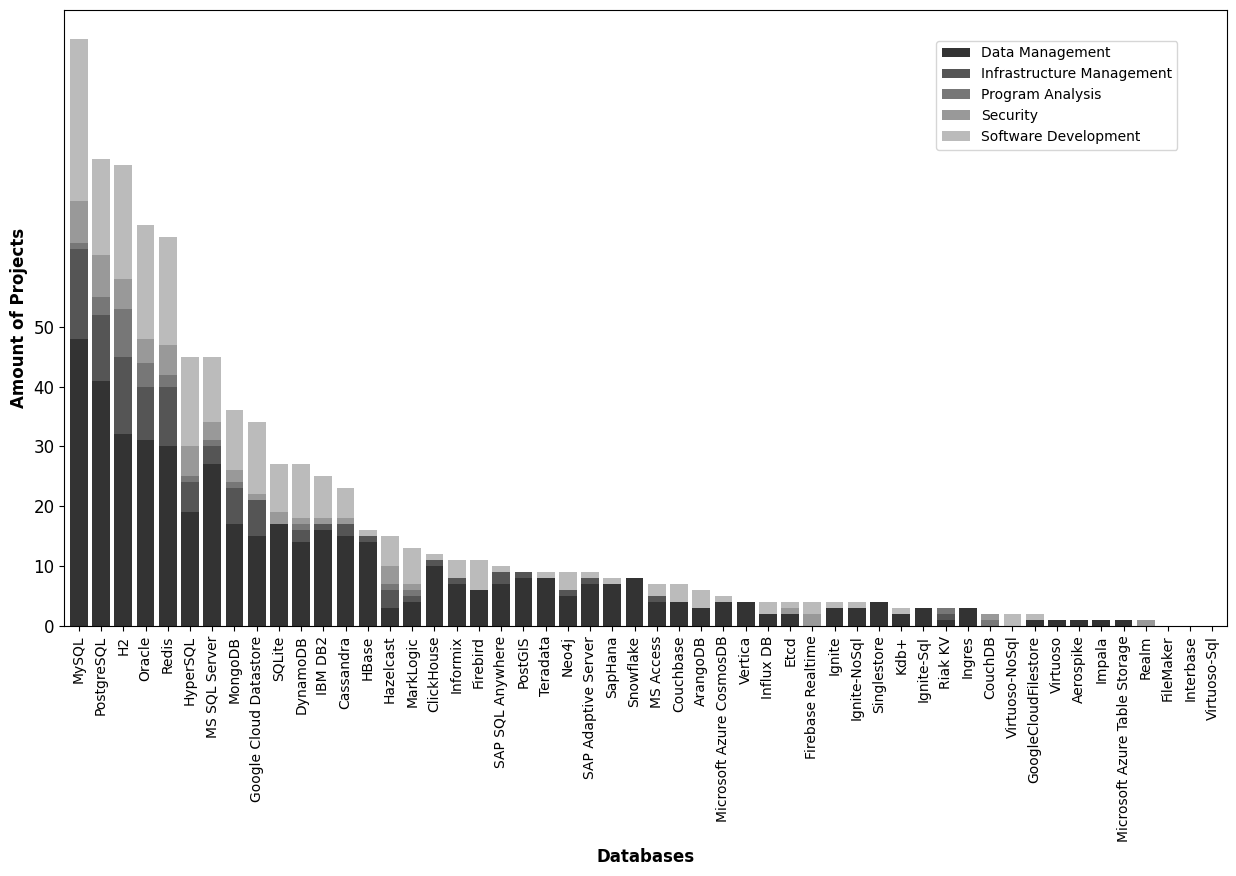

In [17]:
import matplotlib.pyplot as plt

grouped_data = data_group_by_domain.groupby('Domains').sum()

transposed_data = grouped_data.transpose()

# Sort the transposed data in descending order based on Amount of projects
transposed_data['Total'] = transposed_data.sum(axis=1)
transposed_data.sort_values(by='Total', inplace=True, ascending=False)
transposed_data.drop('Total', axis=1, inplace=True)

# Define grayscale colors
gray_colors = ['#333333', '#555555', '#777777', '#999999', '#BBBBBB']

# Create a stacked bar chart
ax = transposed_data.plot(kind='bar', stacked=True, figsize=(15, 8), color = gray_colors, width = 0.8)

# Set chart labels
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# Rotate x-axis labels and set their color and weight
plt.xticks(rotation=90)

# Set y-axis ticks and labels
plt.yticks(range(0, 60, 10), fontsize=12)

# Adiciona grid pontilhado no eixo Y
#plt.grid(axis='y', linestyle=':', linewidth=0.8)


# Display the legend outside the plot
plt.legend(bbox_to_anchor=(0.75, 0.95), loc='upper left', borderaxespad=0.)
plt.savefig(IMAGES_DIR+"/fig4.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()



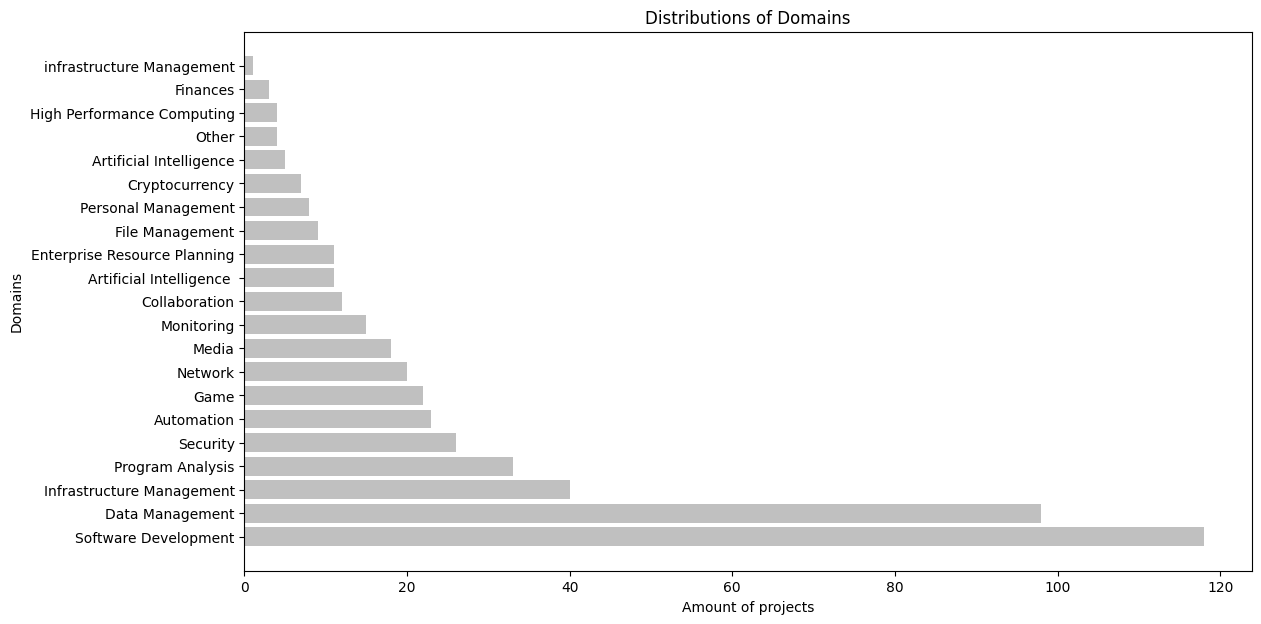

In [52]:
plt.figure(figsize=(13,7))

df = data_with_index.Domains.value_counts()
plt.barh(df.index, df.values, color='silver')
#plt.xticks(rotation=90)

plt.title("Distributions of Domains")
plt.xlabel("Amount of projects")
plt.ylabel("Domains")
plt.show() 

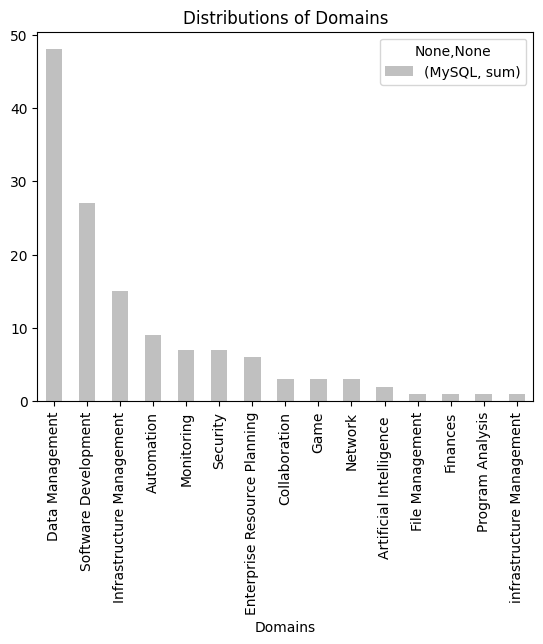

In [53]:
filtered_df = data_with_index.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

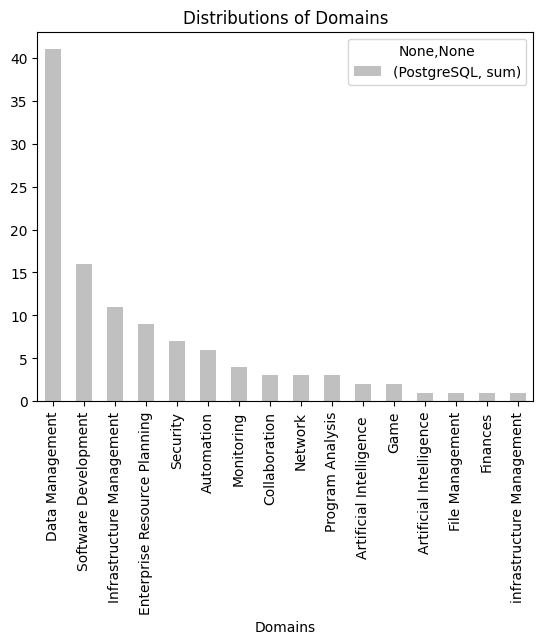

In [54]:

filtered_df = data_with_index.groupby('Domains').agg({'PostgreSQL':['sum']})
filtered_df = filtered_df[filtered_df['PostgreSQL']['sum'] > 0]
result = filtered_df.sort_values(by=('PostgreSQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

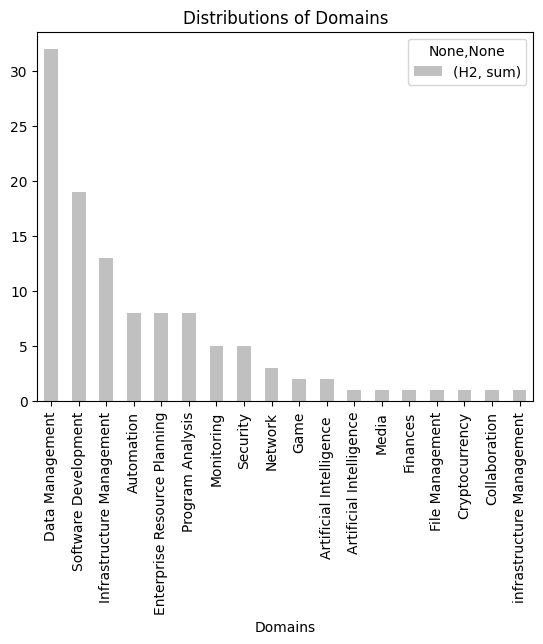

In [55]:

filtered_df = data_with_index.groupby('Domains').agg({'H2':['sum']})
filtered_df = filtered_df[filtered_df['H2']['sum'] > 0]
result = filtered_df.sort_values(by=('H2','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')


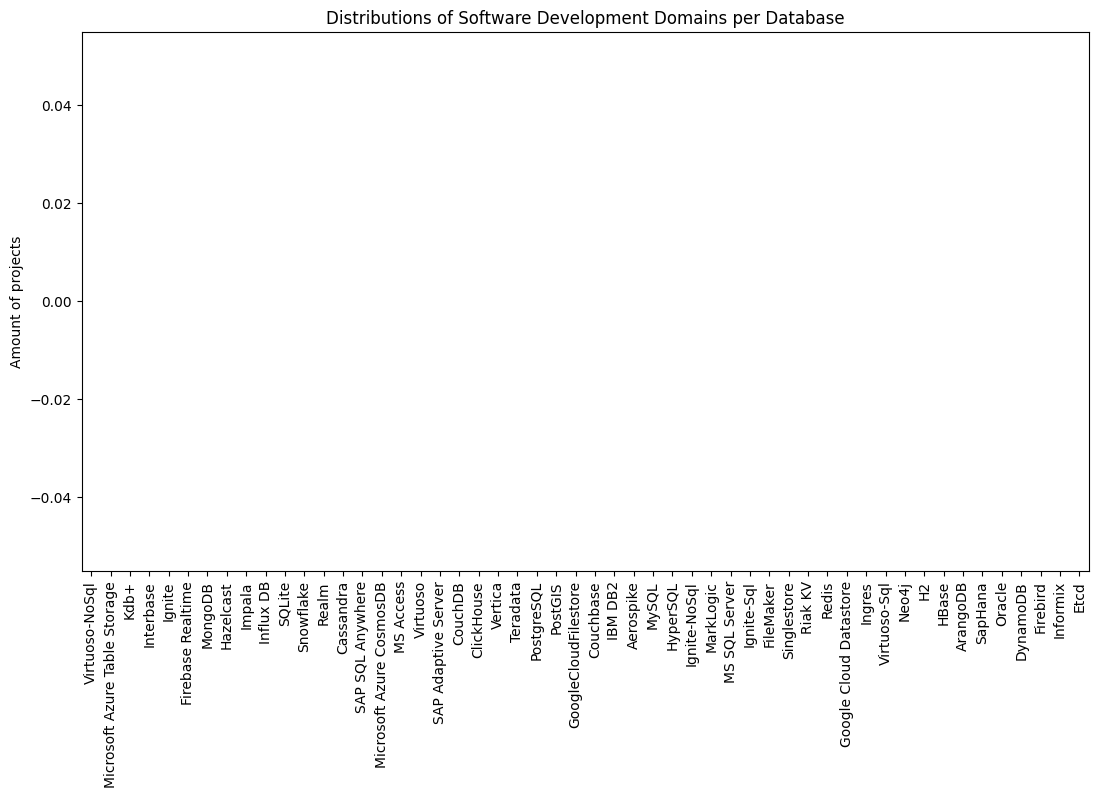

Text(0, 0.5, 'Amount of projects')

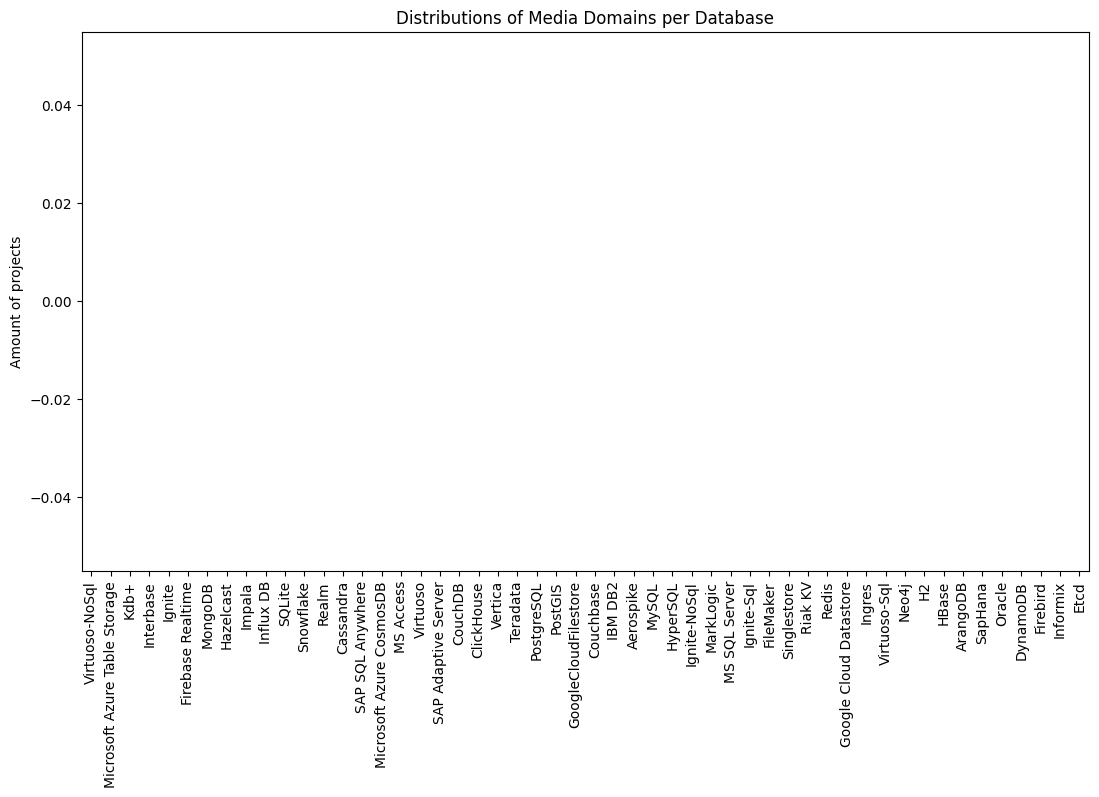

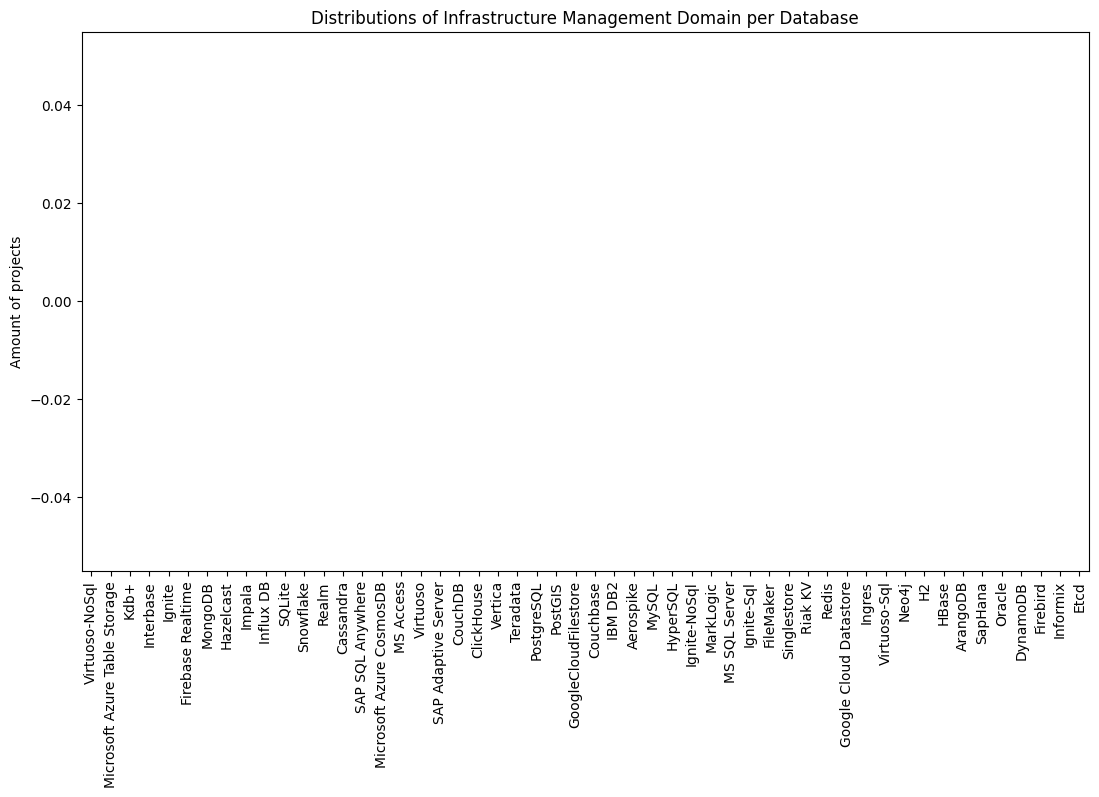

In [56]:


plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='software development'].sum()
df_software_development = df_software_development.iloc[2:].sort_values(ascending=False)
df_software_development.plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Software Development Domains per Database")
plt.ylabel("Amount of projects")
plt.show() 

plt.figure(figsize=(13,7))
media = data_with_index[data_with_index.Domains =='media'].sum()
#print(df_software_development.iloc[2:].sort_values(ascending=False))
media.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver', title = 'Distributions of Domains')
plt.title("Distributions of Media Domains per Database")
plt.ylabel("Amount of projects")
#plt.show() 

plt.figure(figsize=(13,7))
infrastructure_management = data_with_index[data_with_index.Domains =='infrastructure management'].sum()
infrastructure_management.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Infrastructure Management Domain per Database")
plt.ylabel("Amount of projects")
#plt.show()



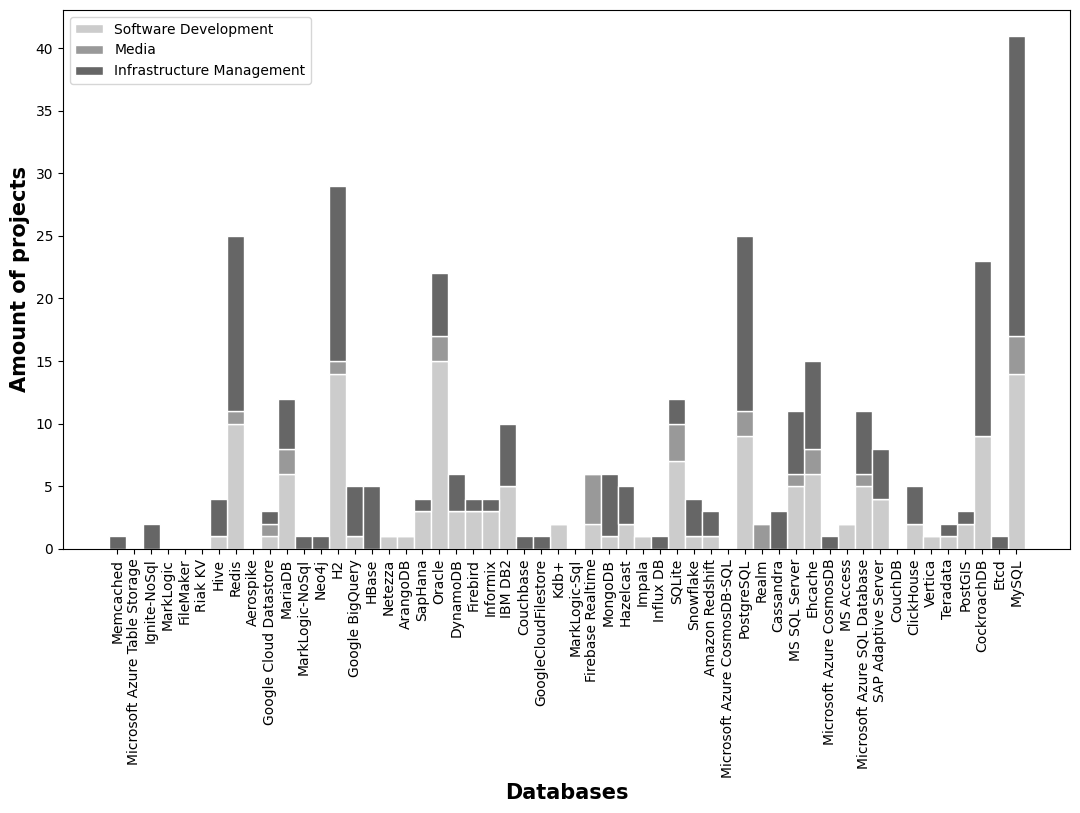

In [69]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth =1.0
fig = plt.subplots(figsize =(13, 7))

names_list = data_with_index.columns.to_list()
names_list.remove('Projects')
names_list.remove('Domains')

domains = data_with_index.groupby('Domains')

software_development = domains.get_group('software development')
software_development_sum = software_development.agg([np.sum])
software_development_results = software_development_sum.iloc[: , 2:].values.tolist()

media = domains.get_group('media')
media_sum = media.agg([np.sum])
media_results = media_sum.iloc[: , 2:].values.tolist()

infrastructure_management = domains.get_group('infrastructure management')
infrastructure_management_sum = infrastructure_management.agg([np.sum])
infrastructure_management_result = infrastructure_management_sum.iloc[: , 2:].values.tolist()

br1 = np.arange(len(software_development_results[0]))
plt.bar(br1, software_development_results[0], color='#CCCCCC', edgecolor='white', width = barWidth, label ='Software Development')
plt.bar(br1, media_results[0], bottom=software_development_results[0], color='#999999', edgecolor='white', width = barWidth, label ='Media')
plt.bar(br1, infrastructure_management_result[0], bottom=[i+j for i,j in zip(software_development_results[0], media_results[0])], color='#666666', edgecolor='white', width = barWidth, label ='Infrastructure Management')
plt.xlabel('Databases', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of projects', fontweight ='bold', fontsize = 15)
plt.xticks(br1, names_list, rotation=90)

plt.legend()
plt.show()

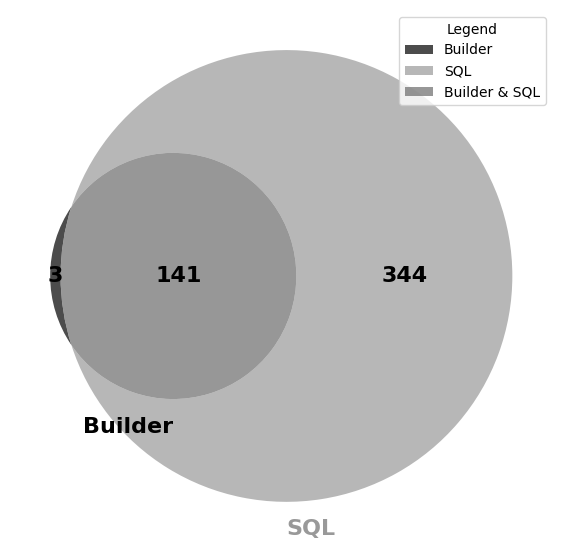

In [57]:
from collections import Counter
from util import RESOURCE_DIR
from matplotlib_venn import venn2

type_characterization = ['query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)

AB_overlap = 0
A_rest = 0
B_rest = 0

for i in range(len(df)):
    if (df.at[i,'Builder'] == df.at[i, 'SQL']):
        AB_overlap += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'SQL'] == 1):
        B_rest += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'Builder'] == 1):
        A_rest += 1

sets = Counter()
sets['10'] = A_rest
sets['01'] = B_rest
sets['11'] = AB_overlap

labels = ('Builder', 'SQL')
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['#000000','#999999']
v = venn2(subsets=sets, set_labels=labels, ax=ax,set_colors= colors, alpha=0.7)

i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(16)
  text.set_fontweight('bold')
  i+=1
  
for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')
  
h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['Builder','SQL','Builder & SQL']
ax.legend(handles=h, labels=l, title="Legend",loc='upper right')  

plt.savefig(IMAGES_DIR+"/fig8.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [58]:
#calcula a quantidade de bancos utilizados e a quantidade de projetos que encontramos bancos
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df['BDsPerProjects'] = df.sum(axis=1, numeric_only=True)
#df = df.iloc[2:].sort_values(ascending=False)
#df.count(by='BDsPerProjects')
df

,Projects,Domains,mybatis,checkafter,Builder,jooq,spring,jdbc,"(IgnoreCase, SQL)",BDsPerProjects
0,Activiti,Enterprise Resource Management,0,0,1,0,1,0,1,3
1,aima-java,Software Development,0,0,0,0,0,0,1,1
2,lottie-android,Game,0,0,0,0,0,0,1,1
3,spring-cloud-alibaba,Software Development,0,0,1,0,1,0,1,3
4,atlas,Software Development,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
483,SmartTubeNext,Media,0,0,0,0,0,0,1,1
484,zaproxy,Security,0,0,0,0,0,0,1,1
485,maxwell,Data Management,0,0,0,0,0,0,1,1
486,jeromq,Infrastructure Management,0,0,0,0,0,0,0,0
